### Question 1: 

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("../2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [3]:
# Basic data summary. We have 5 columns.
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### We see that the mean and the median for order_amount are far apart. Mean: 3145.13, Median: 284. This suggests there are outliers. Also, we see that the max value of 704 k is far higher than the the value at the 75%th percentile, 390

<AxesSubplot:>

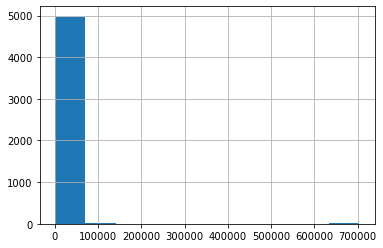

In [10]:
# Histogram for order_amount
df.order_amount.hist()

#### We see that there are not many outliers in the data. The data is mostly orders with low amounts

### b.What metric would you report for this dataset?

#### Since we have a total_items column, the high values may have been caused by large orders. So we will create a new column called amount_per_item, which will be the mean amount per item within an order

In [9]:
df["amount_per_item"] = df["order_amount"] / df["total_items"]

df.amount_per_item.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: amount_per_item, dtype: float64

#### We see that this accounted for a big change. The max value went down from 704 k to 25.725 k. So, we choose to use amount_per_item metric instead of order_amount for AOV analysis

### c.What is its value?

In [25]:
# It's value is 387.7428
df.amount_per_item.mean()

387.7428

<AxesSubplot:>

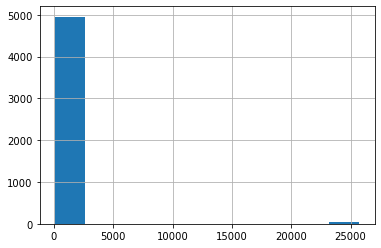

In [11]:
# Replot the histogram
df.amount_per_item.hist()

#### We still see the same issue, namely that most orders are small and reasonable amounts for sneakers. However we have some outliers that create a discrepancy between the mean, 387, and the median, 153.


In [15]:
# We further look into the observations that have the highest amount_per_order
df.loc[df["amount_per_item"] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


#### We decide to run our analysis without shop_id = 78 since we suspect there may be something wrong with shop_id =78. However, we would like to make sure that all orders at shop_id=78 have the same amount_per_item or extremely high outlying values to guarantee that this is not a grave mistake

#### We see that all of these orders were made at shop_id =78. Since a price of 25757 per item is quite high for sneakers, we suspect there may be something wrong with these observations.

In [16]:
df[df['shop_id'] ==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


#### We observe that this shop_id has 25757 amount_per_item for all of its orders. Thus, we see that there is not a lot of risk in removing this shop from our data set for the AOV analysis. Normally, in a professional setting I would contact a supervisor or the shop to make sure that this entry is correct before removing it from the dataset


<AxesSubplot:>

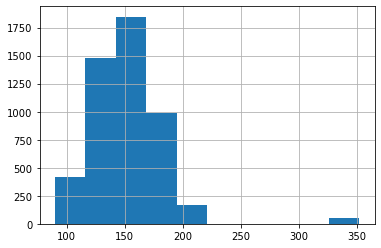

In [20]:
# We drop the observations where shop_id = 78
df_ = df[df.shop_id != 78]

df_.amount_per_item.hist()

# The new dataset looks much better. it looks close a normal distribution
# Yet, we still see outliers so we would like to investigate this farther

In [29]:
# We investigate the outlier at the maximum value for amount_per_item
df_[df_['amount_per_item'] == max(df_['amount_per_item'])]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0


#### Maybe there is something wrong with shop_id = 42 as well. We just run the analysis to see the implications of removing shop=42

<AxesSubplot:>

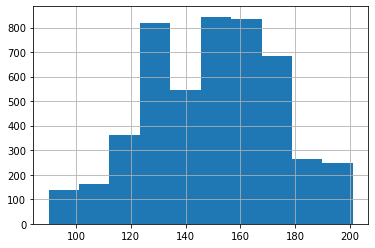

In [23]:
df_last = df_[df_['shop_id'] != 42]

df_last.amount_per_item.hist()

#### This histogram looks much smoother than before. So, if our analysis is sensitive to outliers we could use the new data set without shops 42, and 78

#### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## a.How many orders were shipped by Speedy Express in total?

### Answer: 54
### Query:

#### SELECT COUNT(*) 
#### FROM Orders
#### INNER JOIN Shippers
#### ON Orders.ShipperID = Shippers.ShipperID
#### Where ShipperName = "Speedy Express";

## b.What is the last name of the employee with the most orders?

### Answer: Peacock
### Query:

#### SELECT Employees.LastName, COUNT(*) AS NumberofOrders
#### FROM Orders
#### JOIN Employees
#### ON Orders.EmployeeID = Employees.EmployeeID 
#### GROUP BY Orders.EmployeeID
#### ORDER BY NumberOfOrders DESC
#### LIMIT 1

## c.What product was ordered the most by customers in Germany?

### Answer: Boston Crab Meat, Product ID=40
### Query: 

#### SELECT ProductID, ProductName, Max(QuantityOrdered) AS Quantity 
#### FROM
#### (SELECT Products.ProductID, Products.ProductName, SUM(Quantity) AS QuantityOrdered
#### FROM Customers 
#### INNER JOIN Orders 
#### ON Orders.CustomerID = Customers.CustomerID
#### INNER JOIN OrderDetails
#### ON OrderDetails.OrderID = Orders.OrderID
#### INNER JOIN Products
#### ON Products.ProductID = OrderDetails.ProductID
#### WHERE COUNTRY = "Germany"
#### GROUP BY OrderDetails.ProductID)

